In [15]:
%pwd
from newspaper import Article
from locationfinder import LocationFinder
lf = LocationFinder()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

'/Users/eirikstavelin/Code/chorogrid'

In [16]:
# testing newspaper

url = "http://www.nrk.no/sognogfjordane/katastrofeminuttet-som-oydela-1.10977041"
url = "https://www.nrk.no/sapmi/matfatet-minsker-1.10876743"
url = "http://www.nrk.no/nordnytt/_--hoytrykk-for-naeringslivet-i-nord-1.11024810"
url = "http://nrk.no/nyheter/distrikt/ostfold/1.10952300"
url = "http://www.nrk.no/sognogfjordane/katastrofeminuttet-som-oydela-1.10977041"
url = "http://www.nrk.no/sorlandet/politidrapsmann-pa-rommen-igjen-1.10932037"
url= "https://www.nrk.no/sorlandet/anleggsarbeid-ma-vike-for-vipa-1.13472826"

article = Article(url, language='no')
article.download() # <- download article
#article.html
print()
article.parse() # <- parse article
article.authors
article.publish_date
print(article.text[:100]+" [...]")
article.top_image
article.movies
print()
article.nlp() # <- do nlp
print("keywords:", [w for w in article.keywords])
article.summary

['Marianne Jakobsen']

datetime.datetime(2017, 4, 18, 5, 25, 37, tzinfo=tzoffset(None, 7200))

Det var medlemmer av Norsk Ornitologisk Forening i Aust-Agder som oppdaget konflikten mellom maskine [...]


'https://gfx.nrk.no/YVFsFk5XKJ236Mhjn8AgXwlmVc4k0-MFBLHe4mxq281A'

[]


keywords: ['må', 'til', 'reir', 'som', 'er', 'en', 'anleggsarbeid', 'vipa', 'sier', 'det', 'og', 'med', 'vike']


'– Vipa har i en årrekke hekket i området Myrane ved innkjøringen til Birkeland fra Lillesandsiden, sier Jan Helge Kjøstvedt.\n– I år ser det ut til at det kanskje bare er ett par igjen, i verste fall det eneste i hele kommunen.\nUtfordringene for vipa er at den har reir på bakken.\nReir med egg og unger blir ødelagt ved pløying, harving, planting, såing, gjødsling, sprøyting og under slåtten.\nMen dette går det an å gjøre noe med ved åMerke reir med fargede pinner Pløye utenom reiret, flytting av reir er siste utvei.'

In [17]:
rich_places = lf.disambiguate_places(lf.from_text_to_places(article.text))
rich_places

[('Agder', (58.163832, 8.002964), 'NA'),
 ('Songdalen', (58.195436, 7.786997), ('Songdalen', 1017)),
 ('Vennesla', (58.268564, 7.973144), ('Vennesla', 1014)),
 ('Lillesand', (58.249453, 8.377192), ('Lillesand', 926)),
 ('Vestfold', (59.170786, 10.114436), 'NA'),
 ('Grimstad', (58.340464, 8.593369), ('Grimstad', 904)),
 ('Norge', (62.0, 10.0), 'NA'),
 ('Skånes', (63.769306, 11.400722), ('Levanger', 1719)),
 ('Kristiansand', (58.14615, 7.995733), ('Kristiansand', 1001)),
 ('Søgne', (58.093278, 7.782939), ('Søgne', 1018)),
 ('Birkenes', (62.219864, 5.938894), ('Volda', 1519))]

In [18]:
%pwd

'/Users/eirikstavelin/Code/chorogrid'

In [19]:
# make df from sqlite 
import pandas as pd
import sqlite3 as lite
con = lite.connect("../LocationFinder/norges_kjedeligste.db")
cur = con.cursor()



sql = """SELECT kommune, sted, count(*) dekkning, lat, lon,id, url, kommunenr
FROM kjedelig  GROUP BY sted ORDER BY dekkning DESC;"""

df = pd.read_sql_query(sql, con)

df.head()



df2 = df.loc[df['kommunenr'] != "NA"]
#df2.kommunenr = df2.kommunenr.to_numeric()
#df2 = pd.to_numeric(df2)
df2 = df2.apply(pd.to_numeric, errors='ignore') # hele df til numerisk
df2.head()

df2.kommunenr.dtype

,kommune,sted,dekkning,lat,lon,id,url,kommunenr
0,NA,Norge,17081,62.000000,10.000000,378814,http://nrk.no/kultur/gar-til-angrep-pa-vikerne...,NA
1,Oslo,Oslo,12376,59.912728,10.746092,454368,http://www.nrk.no/sapmi/om/3.-kontakt-nrk-sapm...,301
2,NA,Finnmark,5482,70.483039,26.013511,296559,http://m.nrk.no/artikkel.jsp?art_id=1.10913228,NA
3,NA,Oppland,5204,61.542275,9.716631,263147,http://www.nrk.no/sognogfjordane/vil-at-depart...,NA
4,NA,Troms,5141,69.649205,18.955324,296574,http://nrk.no/nyheter/distrikt/troms_og_finnma...,NA


,kommune,sted,dekkning,lat,lon,id,url,kommunenr
1,Oslo,Oslo,12376,59.912728,10.746092,454368,http://www.nrk.no/sapmi/om/3.-kontakt-nrk-sapm...,301
9,Bergen,Bergen,4371,60.398258,5.329072,158884,http://www.nrk.no/hordaland/flaske-med-svovels...,1201
14,Trondheim,Trondheim,3449,63.430483,10.395058,286402,http://www.nrk.no/sognogfjordane/katastrofemin...,1601
15,Tromsø,Tromsø,3356,69.648900,18.955083,454368,http://www.nrk.no/sapmi/om/3.-kontakt-nrk-sapm...,1902
16,Stavanger,Stavanger,3025,58.965272,5.717983,285161,http://www.nrk.no/rogaland/_-romfolket-ma-kjop...,1103


dtype('int64')

In [46]:
# ok, now lets make a map:

from chorogrid import Colorbin, Chorogrid

import xml.etree.ElementTree as ET
#import pandas as pd
#import re
#import sys
#from math import sqrt
from IPython.display import SVG, display

import colorlover as cl
mycolors = cl.scales['11']['div']['Spectral'] # returns rgb
def rgb2hex(list_of_tuples):
    output = []
    for r, g, b in list_of_tuples:
        output.append("#{0:02x}{1:02x}{2:02x}".format(int(r), int(g), int(b)))
    return output

mycolors = rgb2hex(cl.to_numeric(mycolors))

mycolors = mycolors[::-1] # flip list 


In [47]:
# make some colors accorting to count
mybin = Colorbin(df2['dekkning'], mycolors, proportional=True, decimals=None) #folketal
mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')


In [48]:
states = list(df2.kommunenr)#
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

for lst in ['states', 'colors_by_state', 'font_colors_by_state', 'legend_colors', 'legend_labels']:
    obj = eval(lst)
    print("{:>20}: len {:2}: {}...".format(lst, len(obj), obj[:3]))

              states: len 4201: [301, 1201, 1601]...
     colors_by_state: len 4201: ['#9e0142', '#abdda4', '#abdda4']...
font_colors_by_state: len 4201: ['#e0e0e0', '#101010', '#101010']...
       legend_colors: len 11: ['#5e4fa2', '#3288bd', '#66c2a5']...
       legend_labels: len 11: ['1.0-1126.0', '1126.0-2251.0', '2251.0-3376.0']...


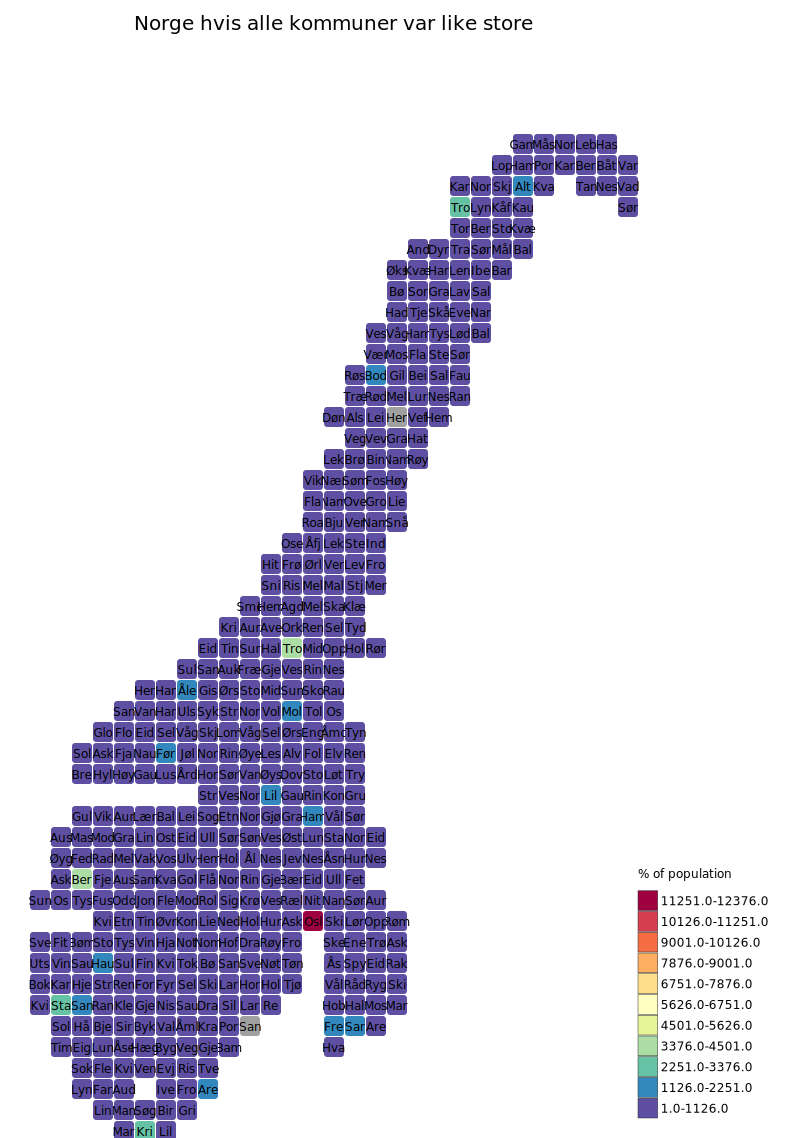

In [49]:
cg = Chorogrid('chorogrid/databases/norway_municilalities2.csv', states, colors_by_state, id_column="kommuneid",lable_column="Navn")#,
cg.set_title('Norge hvis alle kommuner var like store', font_dict={'font-size': 20})
cg.set_legend(legend_colors, legend_labels, title='% of population', height=250, gutter=1, stroke_width=0.5, label_x_offset=2,
                   label_y_offset = 0, font_dict={'font-size': '12px'})
cg.draw_squares(spacing_dict={'margin_right': 160, 'cell_width': 20, 'margin_top': 50}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True)

In [50]:
%pwd

'/Users/eirikstavelin/Code/chorogrid'

,kommune,sted,dekkning,lat_x,lon,id,url,kommunenr,Unnamed: 0,kommuneid,...,fylkesnummer,lat_y,long,geoname_id,folketal,square_x,square_y,hex_x,hex_y,dekk_pr_innbygger
163,Oslo,Finnmarkgata,1,59.917481,10.775567,80598,http://www.nrk.no/ostlandssendingen/1.11204834,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
191,Oslo,Ytre Ringvei,1,59.866764,10.843767,41169,http://www.nrk.no/ostlandssendingen/sperrer-av...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
190,Oslo,Voldsløkka,1,59.942203,10.752825,128099,http://www.nrk.no/nyheter/distrikt/ostlandssen...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
189,Oslo,Vetlandsveien,1,59.909900,10.847939,58376,http://www.nrk.no/ostlandssendingen/sigrids-si...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
162,Oslo,Festningstunnelen,1,59.911289,10.727308,77394,http://www.nrk.no/ostlandssendingen/bilstans-i...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
187,Oslo,Tøyengata,1,59.914119,10.767569,123315,http://www.nrk.no/ostlandssendingen/1.11083550,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
186,Oslo,Trefoldighetskirken,1,59.916786,10.745208,202996,http://www.nrk.no/informasjon/livssynsprogramm...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
185,Oslo,Studenterlunden,1,59.914764,10.734419,16039,http://www.nrk.no/ostlandssendingen/taxiene-kj...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
184,Oslo,Stensrudtjern,1,59.821975,10.872331,100745,http://www.nrk.no/ostlandssendingen/hyttebrann...,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002
183,Oslo,Stensgata,1,59.932214,10.732567,129317,http://www.nrk.no/ostlandssendingen/1.11060145,301,40,301,...,3,59.91273,10.74609,6453366.0,611491.0,13.0,41.0,18.0,41.0,0.000002


              states: len 4201: [301, 1201, 1601]...
     colors_by_state: len 4180: ['#5e4fa2', '#5e4fa2', '#5e4fa2']...
font_colors_by_state: len 4180: ['#e0e0e0', '#e0e0e0', '#e0e0e0']...
       legend_colors: len 11: ['#5e4fa2', '#3288bd', '#66c2a5']...
       legend_labels: len 11: ['0.0-0.1', '0.1-0.1', '0.1-0.2']...


,Unnamed: 0,kommuneid,abbrev,Navn,map_path,fylkesnummer,lat,long,geoname_id,folketal,square_x,square_y,hex_x,hex_y
0,0,101,Hal,Halden,"m 800.69641,2717.5047 c -0.29632,-0.2395 -1.18...",1,59.12478,11.38754,6453395.0,29547.0,15.0,45.0,20.0,45.0
1,1,104,Mos,Moss,"m 713.90122,2612.7701 c 0,-0.061 0.32909,-1.22...",1,59.43403,10.65771,6453384.0,30646.0,16.0,45.0,21.0,45.0
2,2,105,Sar,Sarpsborg,"m 763.45836,2670.379 c -0.0857,-0.336 -0.20657...",1,59.28391,11.10962,6453388.0,53239.0,15.0,46.0,20.0,46.0
3,3,106,Fre,Fredrikstad,"m 739.09839,2670.1401 c -0.16784,-0.3193 -0.16...",1,59.21810,10.92981,6453392.0,75500.0,14.0,46.0,19.0,46.0
4,4,111,Hva,Hvaler,"m 752.28185,2695.2063 c -0.21476,-0.3193 -0.26...",1,59.02526,11.03685,3151309.0,4200.0,14.0,47.0,19.0,47.0


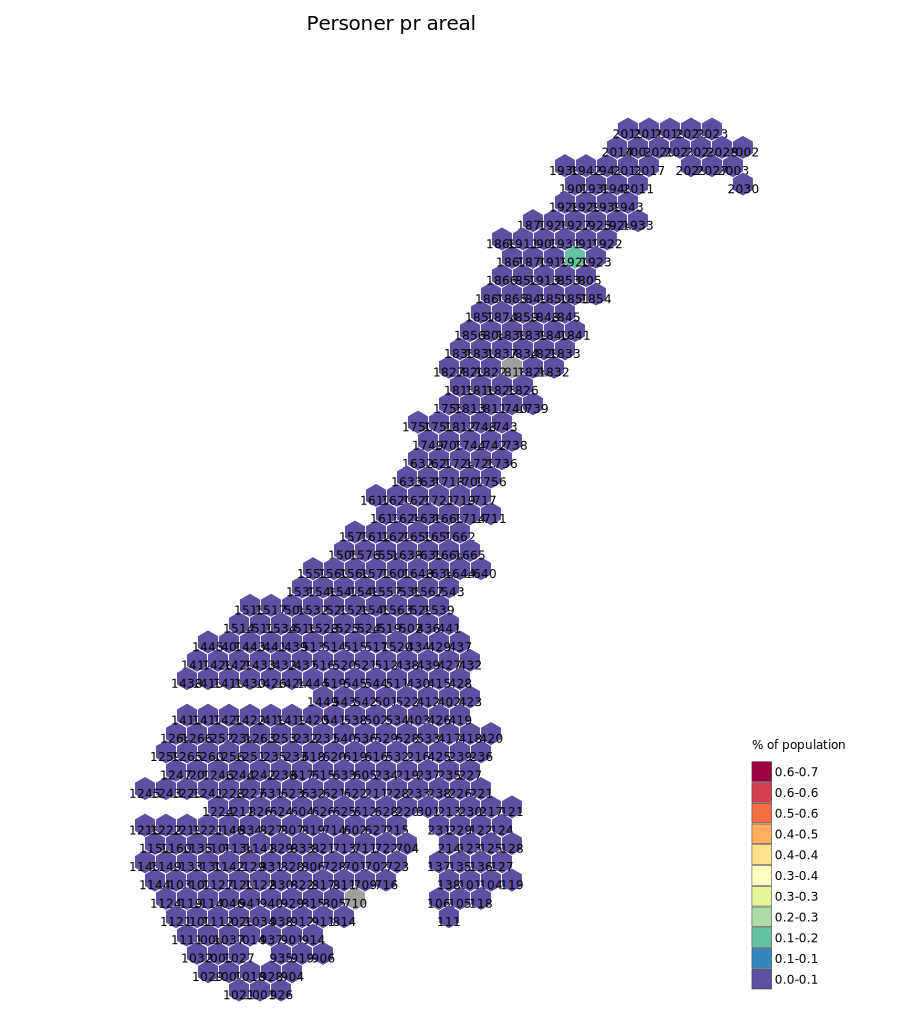

In [51]:
## her gjøres noe helt feil...



# nå vil jeg gjerne dele dekningen pr innbygger:
# make some colors accorting to count
#df2.head()
#cg.df.head()

#join
df3 = pd.merge(df2, cg.df, left_on='kommunenr', right_on="kommuneid")
#pd.merge(frame_1, frame_2, left_on = 'county_ID', right_on = 'countyid')

#df3 = df3.apply(pd.to_numeric, errors='ignore')

df3["dekk_pr_innbygger"] = df3.dekkning / df3.folketal
df3.sort_values("dekk_pr_innbygger").head(10)

mybin = Colorbin(df3['dekk_pr_innbygger'], mycolors, proportional=True, decimals=None) #folketal
mybin.set_decimals(1)
mybin.recalc(fenceposts=True)
mybin.calc_complements(0.5, '#e0e0e0', '#101010')


states = list(df2.kommunenr)#
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

for lst in ['states', 'colors_by_state', 'font_colors_by_state', 'legend_colors', 'legend_labels']:
    obj = eval(lst)
    print("{:>20}: len {:2}: {}...".format(lst, len(obj), obj[:3]))

# mangler noe her


cg = Chorogrid('../chorogrid/chorogrid/databases/norway_municilalities2.csv', states, colors_by_state, id_column="kommuneid",lable_column="abbrev")#,

cg.df.head()
cg.set_title('Personer pr areal', font_dict={'font-size': 20})
cg.set_legend(legend_colors, legend_labels, title='% of population', height=250, gutter=1, stroke_width=0.5, label_x_offset=2,
                   label_y_offset = 0, font_dict={'font-size': '12px'})
cg.draw_hex(spacing_dict={'margin_right': 160, 'cell_width': 20, 'margin_top': 50}) # otherwise legend will be cut off
    # another strategy would be to pass a legend_offset to spacing_dict
cg.done(show=True)

In [100]:
import sys
sys.path

['',
 '/Users/eirikstavelin/Code/chorogrid_backup',
 '/Users/eirikstavelin/Code/afinn/afinn',
 '/Users/eirikstavelin/Code/pythonmoduler/ntb_codes',
 '/Users/eirikstavelin/Code/sortekat',
 '/Users/eirikstavelin/Code/pythonmoduler/python3-vote',
 '/Users/eirikstavelin/Code/newsCat2',
 '/Users/eirikstavelin/Code/LocationFinder',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python35.zip',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/plat-darwin',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/lib-dynload',
 '/usr/local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/site-packages/jdcal-1.2-py3.5.egg',
 '/usr/local/lib/python3.5/site-packages/python_graph_core-1.8.2-py3.5.egg',
 '/usr/local/lib/python3.5/site-packages/IPython/extensions',
 '/Users/eirikstavelin/.ipython']

In [145]:
# testing LocationFinder
import importlib
import locationfinder
importlib.reload(locationfinder)
from locationfinder import LocationFinder
lf = LocationFinder()


rich_places = lf.disambiguate_places(lf.from_text_to_places(article.text), 
                                        verbose=True, municipality=False, hint_location=(58.163832, 8.002964))
rich_places

rich_places = lf.disambiguate_places(lf.from_text_to_places(article.text), 
                                        verbose=False, municipality=True)
rich_places

<module 'locationfinder' from '/Users/eirikstavelin/Code/LocationFinder/locationfinder.py'>

hint_location: (58.163832, 8.002964)
['Aust - Agder', '.', 'Lillesand', 'Grimstad', 'Birkenes kommune', 'skånes', 'Aust - Agder', 'Norge', 'Agder', 'Kristiansand', 'Songdalen', 'Søgne', 'Vennesla', 'Agder', 'Vestfold', 'Agder', 'Songdalen', 'Vennesla', 'Birkenes']

ok ** Vennesla ** 	 antall treff: 	 2 beste treff valgt

[58.268564, 7.973144, 'Vennesla', 'Tettsted', 30, 'Vennesla', 1014, 11796.0, 10000.0]
[58.276172, 7.968781, 'Vennesla', 'Kirke', 59, 'Vennesla', 1014, 12673.0, 10000.0]
ok ** Songdalen ** 	 antall treff: 	 3 beste treff valgt

[58.599492, 8.650208, 'Songdalen', 'Dal', 70, 'Froland', 919, 61550.0, 60000.0]
[58.195436, 7.786997, 'Songdalen', 'Dal', 70, 'Songdalen', 1017, 13185.0, 10000.0]
[61.168531, 6.486714, 'Songdalen', 'Dal', 70, 'Balestrand', 1418, 345455.0, 350000.0]
Ingen treff i SSR på Aust - Agder
ok ** Grimstad ** 	 antall treff: 	 27 beste treff valgt

[59.214875, 11.191272, 'Grimstad', 'Bruk (gardsbruk)', 65, 'Sarpsborg', 105, 218811.0, 220000.0]
[59.20605, 1

[('Agder', (58.163832, 8.002964)),
 ('Vennesla', (58.268564, 7.973144)),
 ('Songdalen', (58.599492, 8.650208)),
 ('Grimstad', (59.214875, 11.191272)),
 ('Søgne', (58.093278, 7.782939)),
 ('Skånes', (63.769306, 11.400722)),
 ('Vestfold', (59.170786, 10.114436)),
 ('Kristiansand', (60.568156, 11.798914)),
 ('Lillesand', (59.024197, 11.034131)),
 ('Birkenes', (61.770958, 11.187083)),
 ('Norge', (62.0, 10.0))]

[('Agder', (58.163832, 8.002964), 'NA'),
 ('Vennesla', (58.268564, 7.973144), ('Vennesla', 1014)),
 ('Songdalen', (58.195436, 7.786997), ('Songdalen', 1017)),
 ('Grimstad', (58.340464, 8.593369), ('Grimstad', 904)),
 ('Søgne', (58.093278, 7.782939), ('Søgne', 1018)),
 ('Skånes', (63.769306, 11.400722), ('Levanger', 1719)),
 ('Vestfold', (59.170786, 10.114436), 'NA'),
 ('Kristiansand', (58.14615, 7.995733), ('Kristiansand', 1001)),
 ('Lillesand', (58.249453, 8.377192), ('Lillesand', 926)),
 ('Birkenes', (62.219864, 5.938894), ('Volda', 1519)),
 ('Norge', (62.0, 10.0), 'NA')]